# Modelos Poblacionales
## Dinámica del HIV
### Modelo conceptual

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
CD4_N = 1000.0 # cel/mm³
CD8_N = 550.0 # cel/mm³

a = 0.25
b = 50.0
c = 0.25
d = 10.0
e = 0.01
f = 0.0045

CD4_0 = 1000.0 # cel/mm³
CD8_0 = 550.0 # cel/mm³
V_0 = 0.001 # cel/mm³

dt = 0.01 # equivale a una muestra cada 3.65 días

In [17]:
def dCD4_dt(CD4, V):
	return -1 * a * CD4  - b * CD4 * V + a * CD4_N

def dCD8_dt(CD8, V):
	return -1 *  c * CD8  + d * CD8 * V + c * CD8_N

def dV_dt_sinTrat(CD4, CD8, V):
		return e * CD4 * V - f * CD8 * V


In [18]:
def euler(muestras, CD4s, CD8s, Vs, tratamiento=None):
	for i in range(len(muestras[1:])):
		CD4 = CD4s[-1]
		CD8 = CD8s[-1]
		V = Vs[-1]

		CD4s.append(CD4 + dt * dCD4_dt(CD4, V))
		CD8s.append(CD8 + dt * dCD8_dt(CD8 , V))
		if tratamiento is None or i < len(muestras)/2:
			Vs.append(V + dt * dV_dt_sinTrat(CD4, CD8, V))
		else:
			Vs.append(V + dt * dV_dt_tratArt(CD4, CD8, V))

	return CD4s, CD8s, Vs
	

#### Persona sin tratamiento

In [19]:
N = 1000
muestras = np.arange(0, N * dt, dt)
# muestras = np.arange(start=0, stop=365 * 10, step=dt)

CD4s = [CD4_0]
CD8s = [CD8_0]
Vs = [V_0]

CD4s, CD8s, Vs = euler(muestras, CD4s, CD8s, Vs)
print(CD4s[0], CD8s[0], Vs[0])

1000.0 550.0 0.001


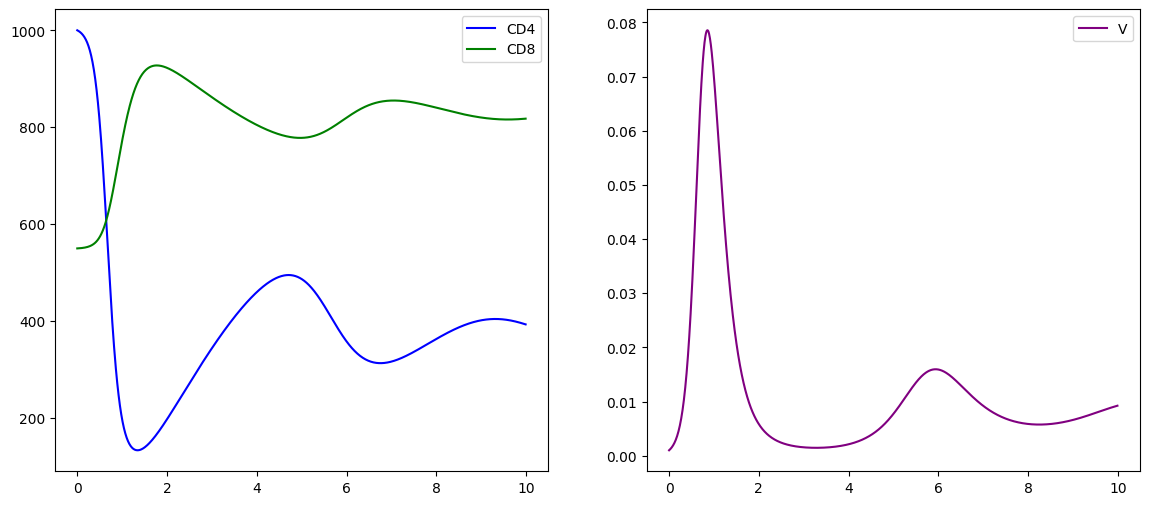

In [20]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(muestras, CD4s, label="CD4", color="blue")
plt.plot(muestras, CD8s, label="CD8", color="green")
plt.legend()

plt.subplot(122)
plt.plot(muestras, Vs, label="V", color="purple")
plt.legend()

plt.show()

#### Tratamiento del artículo

In [21]:
def U(V):
	g = e * CD4_N
	return g * V

def dV_dt_tratArt(CD4, CD8, V):
		return e * CD4 * V - f * CD8 * V - U(V)

In [22]:
N = 1000
muestras = np.arange(0, N * dt, dt)
# muestras = np.arange(start=0, stop=365 * 10, step=dt)

CD4s = [CD4_0]
CD8s = [CD8_0]
Vs = [V_0]

CD4s, CD8s, Vs = euler(muestras, CD4s, CD8s, Vs, U)

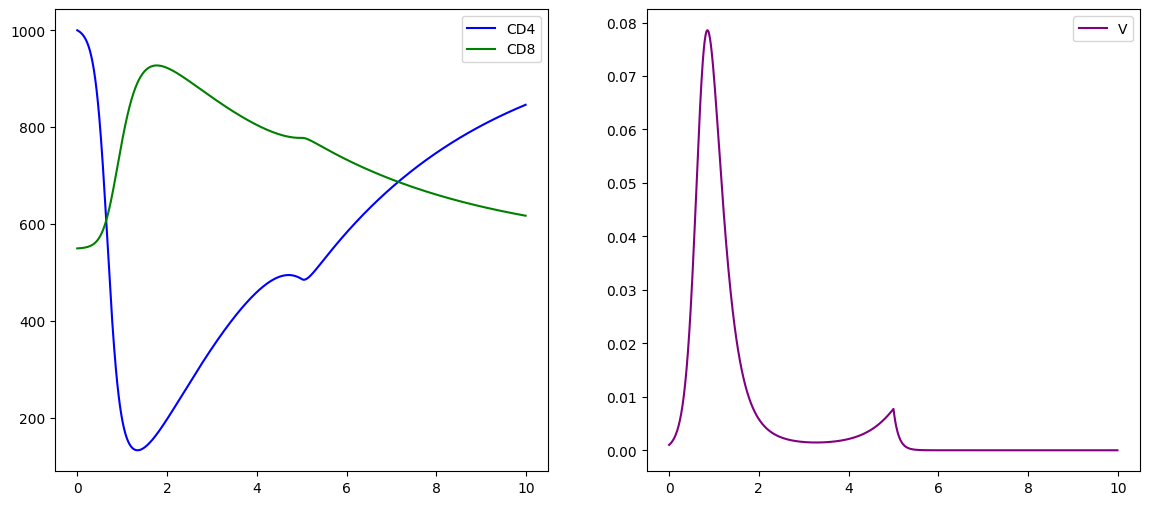

In [23]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(muestras, CD4s, label="CD4", color="blue")
plt.plot(muestras, CD8s, label="CD8", color="green")
plt.legend()

plt.subplot(122)
plt.plot(muestras, Vs, label="V", color="purple")
plt.legend()

plt.show()

#### Tratamiento con antiretrovirales
Debería modificarse los parámetros que relacionan CD4 con V o agregar un término extra en la tasa de V

In [24]:
def euler_exp(muestras, CD4s, CD8s, Vs, tratamiento=None):
	for i in range(len(muestras[1:])):
		CD4 = CD4s[-1]
		CD8 = CD8s[-1]
		V = Vs[-1]

		CD4s.append(CD4 + dt * dCD4_dt(CD4, V))
		CD8s.append(CD8 + dt * dCD8_dt(CD8 , V))
		if i == len(muestras)/2:
			e = 0.01
			c = 0.025
		if tratamiento is None:
			Vs.append(V + dt * dV_dt_sinTrat(CD4, CD8, V))
		else:
			Vs.append(V + dt * dV_dt_tratArt(CD4, CD8, V))

	return CD4s, CD8s, Vs
	

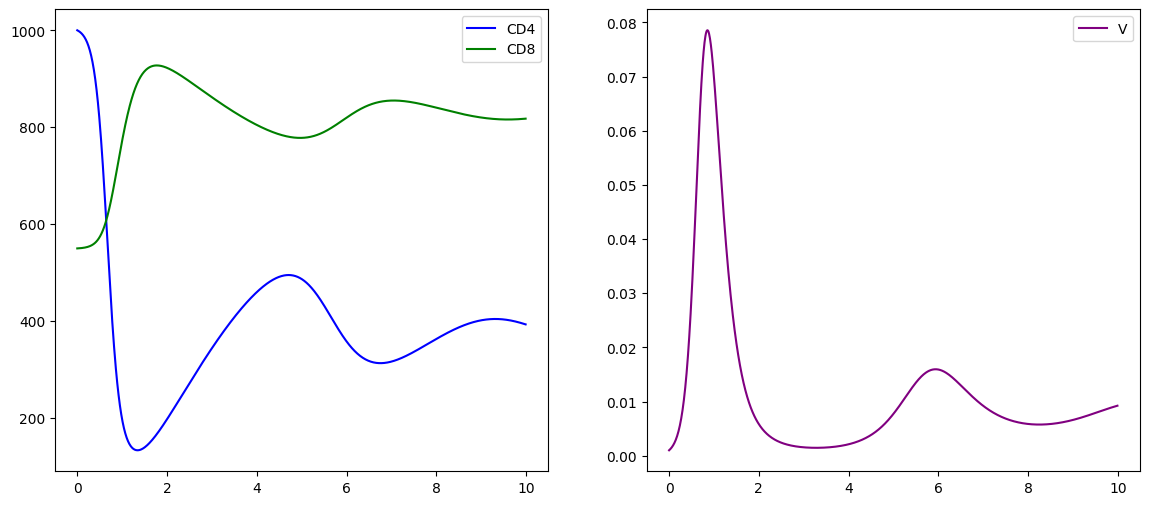

In [25]:
N = 1000
muestras = np.arange(0, N * dt, dt)
# muestras = np.arange(start=0, stop=365 * 10, step=dt)

CD4s = [CD4_0]
CD8s = [CD8_0]
Vs = [V_0]

CD4s, CD8s, Vs = euler(muestras, CD4s, CD8s, Vs)

plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot(muestras, CD4s, label="CD4", color="blue")
plt.plot(muestras, CD8s, label="CD8", color="green")
plt.legend()

plt.subplot(122)
plt.plot(muestras, Vs, label="V", color="purple")
plt.legend()

plt.show()

**Pregunra de parcial:** no hay conservación

- CD4: cooperadoras
- CD8: citotóxicas